# Keras

## Exploração do dataset de vinho

In [24]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import AUC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

In [25]:
# Dataset do vinho vermelho
# Origem dos dados http://www3.dsi.uminho.pt/pcortez/wine/ ou https://archive.ics.uci.edu/dataset/186/wine+quality
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"

In [48]:
data = pd.read_csv(url,sep=';')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [27]:
# Tamanho da amostra
data.shape

(1599, 12)

In [28]:
# Número de classificação
data['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [29]:
# Plotas boxplot das features
px.box(data, points="all")

In [49]:
# Retirando outliers
data = data[data['total sulfur dioxide']<200]

In [31]:
# Tamanho da amostra pós retirada dos outliers
data.shape

(1597, 12)

In [13]:
# Plotas boxplot das features
px.box(data, points="all")

In [32]:
data.isna().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


## Conclusão da exploração do dataset
O dataset apresenta características de vinho e a qualificação dele. O dataset apresenta 1599 linhas e 11 features. Após a retirada dos outliers o dataset passou a ter uma amostra de 1597 linhas. Um desafio será transformar este dataset que é um multiclasse, tendo notas de 3 a 8, em uma classificação binária ( É bom ou não)

## Treino do modelo

In [50]:
# função para binarizar o dataset
def binarize(x, threshold):
    if x < threshold:
        return 1
    return 0



In [51]:
# Aplicar binarização
threshold = 5.5
data['quality_binary'] = data['quality'].apply(lambda x: binarize(x, threshold))

# Separar features e target
X = data.drop(['quality', 'quality_binary'], axis=1).values
y = data['quality_binary'].values

# Dividir os dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [52]:
data['quality_binary'].value_counts(
)

,count
quality_binary,
0,853
1,744


In [53]:
model = Sequential()
model.add(Dense(1, input_dim=X.shape[1], activation='sigmoid'))

# Compilar o modelo
model.compile(optimizer=Adam(),
              loss='binary_crossentropy',
              metrics=['accuracy', AUC(name='auc')])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [54]:
history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=10,
                    validation_split=0.2,
                    verbose=1)


Epoch 1/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5009 - auc: 0.4946 - loss: 13.7442 - val_accuracy: 0.5352 - val_auc: 0.4941 - val_loss: 10.2210
Epoch 2/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5181 - auc: 0.4579 - loss: 8.9034 - val_accuracy: 0.5039 - val_auc: 0.4578 - val_loss: 6.1159
Epoch 3/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5067 - auc: 0.4508 - loss: 4.6624 - val_accuracy: 0.4648 - val_auc: 0.3913 - val_loss: 3.2941
Epoch 4/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4548 - auc: 0.3886 - loss: 2.5866 - val_accuracy: 0.4062 - val_auc: 0.3748 - val_loss: 2.1375
Epoch 5/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3909 - auc: 0.3631 - loss: 2.0083 - val_accuracy: 0.3945 - val_auc: 0.3814 - val_loss: 1.6239
Epoch 6/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4302 - auc: 0.4072 - loss: 1.4266 - val_accuracy: 0.4102 - val_auc: 0.4046 - val_loss: 1.2052
Epoch 7/50
103/103 ━━━━━━━━━━━━━━━━━━━

In [55]:
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Calcular acurácia e métrica F1
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Acurácia: {accuracy:.4f}")
print(f"Métrica F1: {f1:.4f}")


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Acurácia: 0.6562
Métrica F1: 0.6099


## Interpretação dos resultado
1. O que são as métricas pedidas
- Acurácia: Mede a proporção de previsões corretas feitas pelo modelo sobre todas as previsões.

- Métrica F1: Uma média entre precisão e recall. Normalmente útil quando o dataset está desbalanceado
2. Motivos para os resultados:
- Números de amostras, 1500 amostras é um número baixo para o treinamento de um modelo de deep learning.
- O dataset é originalmente um dataset de notas (multiclasses) binarizar ele entre "bom" ou "ruim" acaba prejudicando a sensitividade dos resultados.
- Acredito que esses resultados iniciais possam ter sido bom, considerando todo o contexto.
3. Possíveis melhorias:
- Considerando um aumento nas amostras do dataset e mantendo o balanceamento no target, é possível incluir essas mudanças no treinamento:
    - Experimentar diferentes taxas de aprendizado, números de épocas, tamanhos de batch, e até mesmo a arquitetura da rede neural (adicionando mais unidades, camadas e funções de ativação no processo)
    - Experimentar diferentes proporções de divisão de teste
    - Procurar realizar uma feature engineering de maior qualidade, normalizando os dados
    - Utilizar cross-validation para ter um resultado mais honesto e robusto


# Pytorch
## Criação de modelo extra, para testar outra biblioteca e outros parâmetros

In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader,TensorDataset
import matplotlib.pyplot as plt
import scipy.stats as stats

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data = pd.read_csv(url,sep=';')
data = data[data['total sulfur dioxide']<200] # retirada de outliers
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
data.keys()

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [ ]:
#binarizar
def binarize(x, threshold):
    if x < threshold:
        return 1
    return 0

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
def data_transform(threshold):
    features = data.keys().drop('quality')

    # Binarizar a qualidade
    data['boolQuality'] = data['quality'].apply(lambda x: binarize(x, threshold))

    # Dividir os dados em treino e teste
    # Testando com 10 porcento do dataset
    X_train, X_val, y_train, y_val = train_test_split(data[features], data['boolQuality'], test_size=0.1, random_state=42)

    # Instanciar o MinMaxScaler
    scaler = MinMaxScaler()

    # Fit e transform apenas nos dados de treino
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)

    # Transformar em tensores
    dataT_train = torch.tensor(X_train_scaled).float()
    dataT_val = torch.tensor(X_val_scaled).float()

    labels_train = torch.tensor(y_train.values).float()
    labels_val = torch.tensor(y_val.values).float()

    # Transformar labels em matrizes
    labels_train = labels_train[:, None]
    labels_val = labels_val[:, None]

    # Dataset e dataloaders
    batch_size = 8

    train_dataset = TensorDataset(dataT_train, labels_train)
    val_dataset = TensorDataset(dataT_val, labels_val)

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, drop_last=True)
    val_loader = DataLoader(val_dataset, batch_size=val_dataset.tensors[0].shape[0])  # Usando batch size igual ao tamanho do conjunto de validação

    return train_loader, val_loader, data, dataT_train, labels_train, X_train_scaled

# Exemplo de uso:
train_loader, val_loader, data, dataT_train, labels_train, X_train_scaled = data_transform(threshold=5.5)  # Substitua o valor de threshold conforme necessário


In [ ]:
dataT_train

tensor([[0.1062, 0.1164, 0.2600,  ..., 0.5118, 0.1257, 0.7846],
        [0.2301, 0.3664, 0.0300,  ..., 0.4724, 0.0359, 0.1692],
        [0.2655, 0.2055, 0.2500,  ..., 0.3228, 0.1437, 0.1077],
        ...,
        [0.2301, 0.3425, 0.0600,  ..., 0.6063, 0.1257, 0.1692],
        [0.1416, 0.4555, 0.0000,  ..., 0.6693, 0.1677, 0.2462],
        [0.4779, 0.2123, 0.3300,  ..., 0.3780, 0.2096, 0.2462]])

In [ ]:
labels_train

tensor([[0.],
        [1.],
        [1.],
        ...,
        [1.],
        [1.],
        [1.]])

In [ ]:
X_train_scaled.shape

(1437, 11)

In [ ]:
data_transform(6.5)

(<torch.utils.data.dataloader.DataLoader at 0x7e9a816019f0>,
       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
 0               7.4             0.700         0.00             1.9      0.076   
 1               7.8             0.880         0.00             2.6      0.098   
 2               7.8             0.760         0.04             2.3      0.092   
 3              11.2             0.280         0.56             1.9      0.075   
 4               7.4             0.700         0.00             1.9      0.076   
 ...             ...               ...          ...             ...        ...   
 1594            6.2             0.600         0.08             2.0      0.090   
 1595            5.9             0.550         0.10             2.2      0.062   
 1596            6.3             0.510         0.13             2.3      0.076   
 1597            5.9             0.645         0.12             2.0      0.075   
 1598            6.0             0.31

In [ ]:
for X, y in train_loader:
    print(X.shape)
    print(y.shape)

torch.Size([8, 11])
torch.Size([8, 1])
torch.Size([8, 11])
torch.Size([8, 1])
torch.Size([8, 11])
torch.Size([8, 1])
torch.Size([8, 11])
torch.Size([8, 1])
torch.Size([8, 11])
torch.Size([8, 1])
torch.Size([8, 11])
torch.Size([8, 1])
torch.Size([8, 11])
torch.Size([8, 1])
torch.Size([8, 11])
torch.Size([8, 1])
torch.Size([8, 11])
torch.Size([8, 1])
torch.Size([8, 11])
torch.Size([8, 1])
torch.Size([8, 11])
torch.Size([8, 1])
torch.Size([8, 11])
torch.Size([8, 1])
torch.Size([8, 11])
torch.Size([8, 1])
torch.Size([8, 11])
torch.Size([8, 1])
torch.Size([8, 11])
torch.Size([8, 1])
torch.Size([8, 11])
torch.Size([8, 1])
torch.Size([8, 11])
torch.Size([8, 1])
torch.Size([8, 11])
torch.Size([8, 1])
torch.Size([8, 11])
torch.Size([8, 1])
torch.Size([8, 11])
torch.Size([8, 1])
torch.Size([8, 11])
torch.Size([8, 1])
torch.Size([8, 11])
torch.Size([8, 1])
torch.Size([8, 11])
torch.Size([8, 1])
torch.Size([8, 11])
torch.Size([8, 1])
torch.Size([8, 11])
torch.Size([8, 1])
torch.Size([8, 11])
torch

In [ ]:
for X, y in val_loader:
    print(X.shape)
    print(y.shape)

torch.Size([160, 11])
torch.Size([160, 1])


In [ ]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,boolQuality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [ ]:
#modelo
def model():
    class model_ann(nn.Module):

        def __init__(self):
            super().__init__()
            #primeria layer com 11 entradas
            self.input = nn.Linear(11, 16)
            #hidden layers
            self.hidden1  = nn.Linear(16, 32)
            self.hidden2  = nn.Linear(32, 32)
            #output
            self.output = nn.Linear(32,1)
            #foward
        def forward(self, x):
            x = F.leaky_relu(self.input(x))
            x = F.leaky_relu(self.hidden1(x))
            x = F.leaky_relu(self.hidden2(x))
            x = self.output(x)
            return x

    #instancia do modelo
    modelo = model_ann()
    #loss function
    lossfun = nn.BCEWithLogitsLoss()
    #optimizer
    optimizer = torch.optim.Adam(modelo.parameters(), lr = 0.001)
    #retorna a instancia, loss function e optimizador
    return modelo, lossfun, optimizer

In [ ]:
#teste
modeltest, loss, opt = model()
print(modeltest)
# input de test
input = torch.rand(10,11)
modeltest(input)

model_ann(
  (input): Linear(in_features=11, out_features=16, bias=True)
  (hidden1): Linear(in_features=16, out_features=32, bias=True)
  (hidden2): Linear(in_features=32, out_features=32, bias=True)
  (output): Linear(in_features=32, out_features=1, bias=True)
)


tensor([[-0.2736],
        [-0.2673],
        [-0.2559],
        [-0.2783],
        [-0.3157],
        [-0.2590],
        [-0.2418],
        [-0.2971],
        [-0.2751],
        [-0.2528]], grad_fn=<AddmmBackward0>)

In [ ]:
model, lossfun, opt = model()

In [ ]:
pred_test =  torch.rand(10,11)
y_test = torch.rand(10, 11)

In [ ]:
#treino
#numero de epocas
epochs = 500
#instanciar array acuracia de treino
train_array = []
#instanciar array acuracia de teste
test_array = []
#instanciar tensor.zeros de loss
losses = torch.zeros(epochs)
#looping entre as epocas
for epochi in range(epochs):
    #instancia acuracia de batch
    batch_acc = []
    #instancia array de loss batch
    batch_loss = []
    #looping entre as batch
    for X, y in train_loader:
        #foward
        pred = model(X)
        #loss
        loss = lossfun(pred, y)
        #backprop
        opt.zero_grad()
        loss.backward
        opt.step()
        #computa acuracia da batch
        batch_acc.append( 100*torch.mean(((pred>0) == y).float()).item() )

        #computa loss da batch
        batch_loss.append(loss.item())

    #computa média da acuracia das batches
    train_array.append(np.mean(batch_acc))
    #computa média das losses
    losses[epochi] = np.mean(batch_loss)
    #extrair os valores do x e y
    X, y = next(iter(val_loader))
    #torch no grad
    with torch.no_grad():
        #foward pass
        pred = model(X)
    test_array.append( 100*torch.mean(((pred>0) == y).float()).item() )




In [ ]:
train_array

[46.71787709497207,
 46.787709497206706,
 46.787709497206706,
 46.857541899441344,
 46.857541899441344,
 46.71787709497207,
 46.787709497206706,
 46.787709497206706,
 46.857541899441344,
 46.787709497206706,
 46.927374301675975,
 46.787709497206706,
 46.787709497206706,
 46.857541899441344,
 46.927374301675975,
 46.927374301675975,
 46.71787709497207,
 46.787709497206706,
 46.857541899441344,
 46.857541899441344,
 46.787709497206706,
 46.857541899441344,
 46.787709497206706,
 46.787709497206706,
 46.64804469273743,
 46.927374301675975,
 46.927374301675975,
 46.927374301675975,
 46.857541899441344,
 46.71787709497207,
 46.71787709497207,
 46.857541899441344,
 46.787709497206706,
 46.71787709497207,
 46.927374301675975,
 46.857541899441344,
 46.857541899441344,
 46.857541899441344,
 46.927374301675975,
 46.857541899441344,
 46.71787709497207,
 46.71787709497207,
 46.857541899441344,
 46.857541899441344,
 46.857541899441344,
 46.787709497206706,
 46.997206703910614,
 46.787709497206706,
 

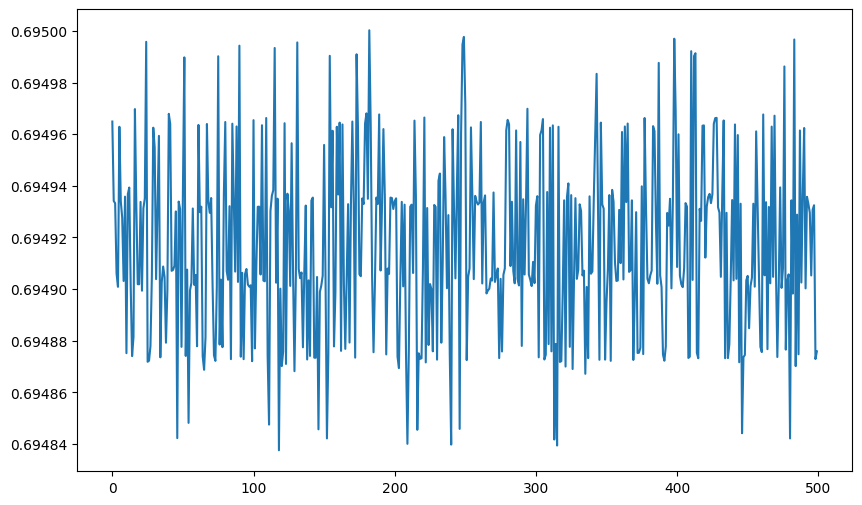

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(losses)


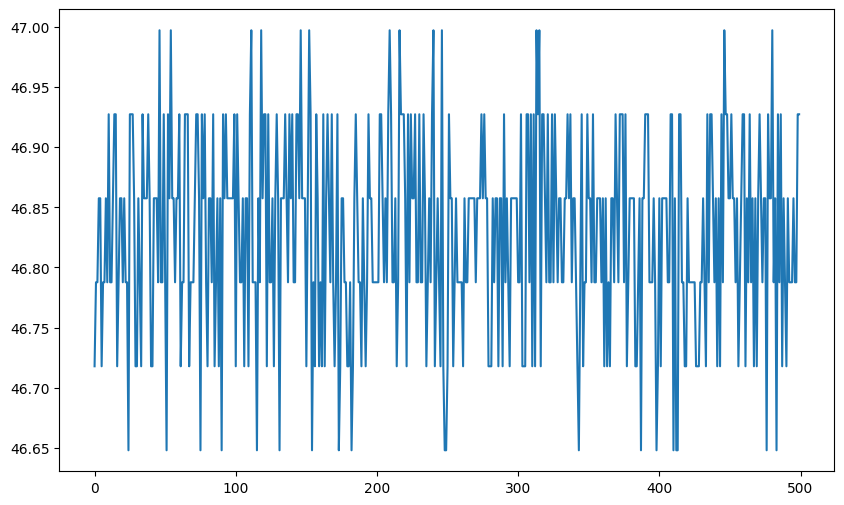

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(epochs), train_array)